In [19]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

<Axes: >

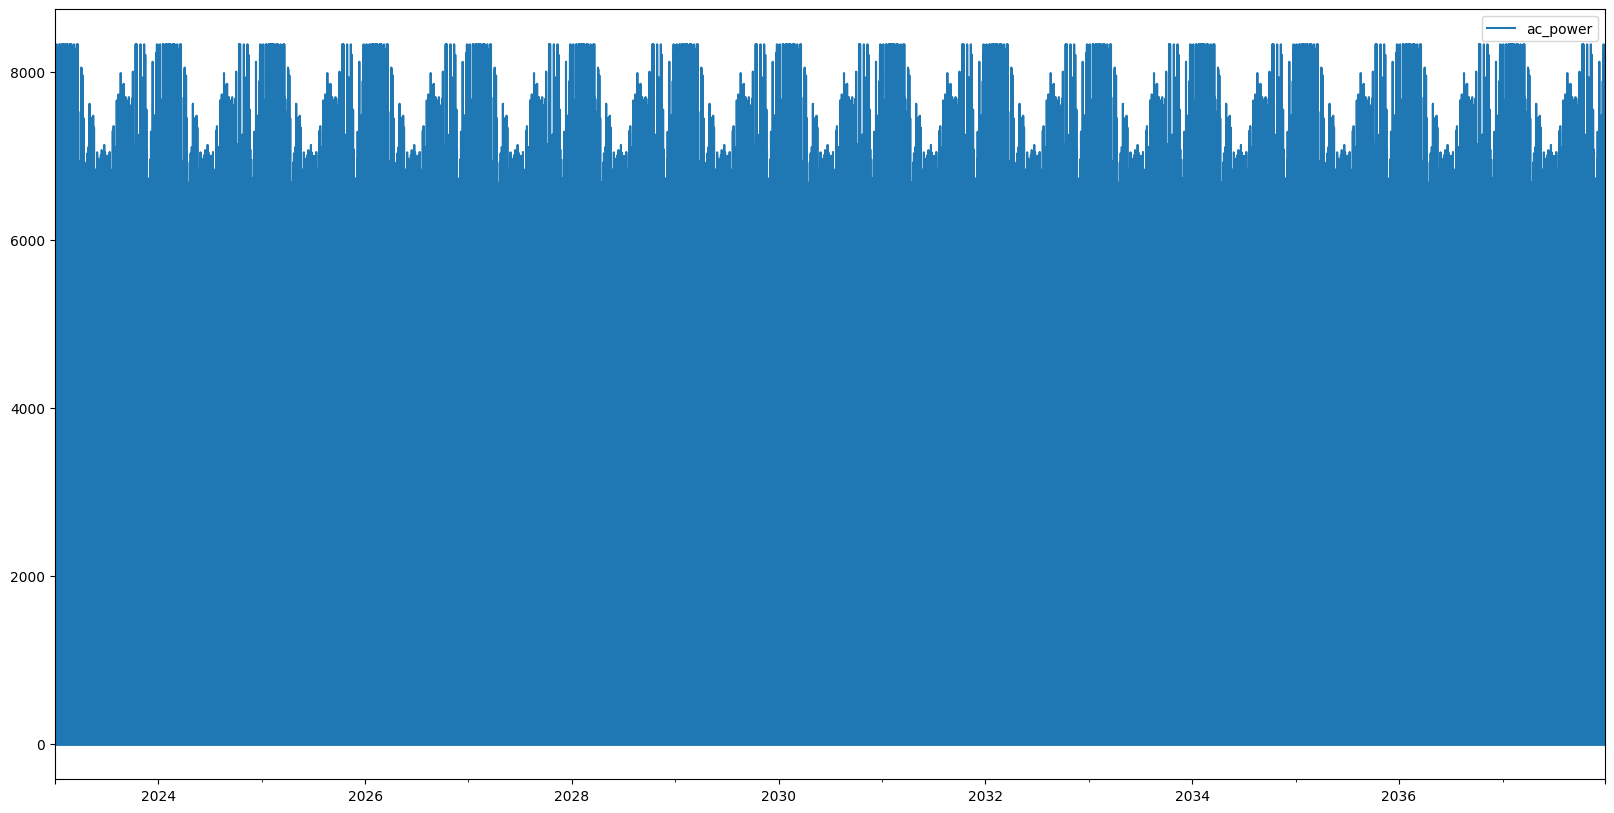

In [44]:
# Load a output and extrapolate it to 15years

with open("data/pvwatts/raw/system_capacity10_module_type0_array_type0_tilt10.json") as f:
    hourly_data = json.load(f)["outputs"]["ac"]
    df = pd.DataFrame(
            index = pd.date_range(start="01/01/2023", freq="H", periods=365*24*15, inclusive="both"),
            data={"ac_power" : hourly_data*15}
                ) 
    
df.plot(kind="line", figsize=(20,10))

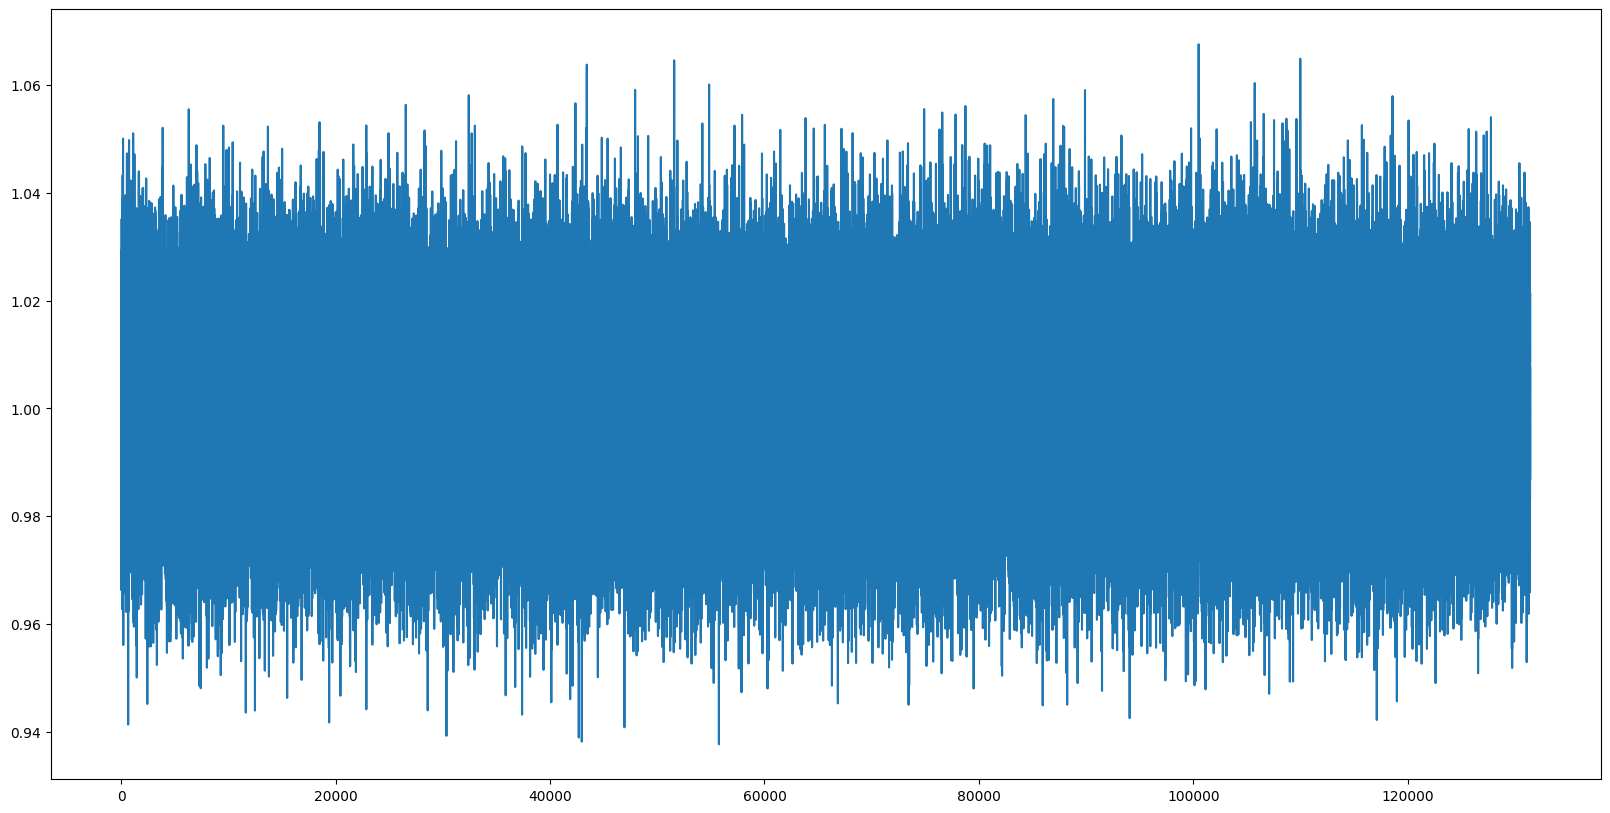

In [11]:
noise = np.random.normal(loc=1.0, scale=0.015, size=len(df))

plt.figure(figsize=(20, 10))
plt.plot(noise)

In [14]:
# Create the degradation factor
degradation_factor = np.linspace(start=1.0, stop=(0.995**15), num=len(df))

In [18]:
for i in [df, noise, degradation_factor]:
    print(len(i))

131400
131400
131400


In [26]:
raw_dir = Path("data/pvwatts/raw/")
interim_dir = Path("data/pvwatts/interim/")


In [35]:
for path in raw_dir.iterdir():
    print(path)
    with open(path) as f:
        hourly_data = json.load(f)["outputs"]["ac"]
        hourly_data = np.asarray(hourly_data)
    hourly_data = 

data/pvwatts/raw/system_capacity60_module_type0_array_type1_tilt30.json
[    0.        0.        0.        0.        0.        0.        0.
  2471.448  2463.983 12984.141 27367.856 36851.4   50000.    36977.649
 39915.206 29644.449 23892.561 13265.585  6842.361     0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.      201.481  7260.077 27070.934
 27521.937 32060.499 40388.221 36398.38  23776.108 22910.934 10955.653
  6272.433     0.        0.        0.        0.        0.        0.
     0.   ]
data/pvwatts/raw/system_capacity40_module_type2_array_type0_tilt10.json
[    0.        0.        0.        0.        0.        0.        0.
  1129.27   1768.88   8935.313 18325.238 24831.798 33333.333 25030.532
 26758.278 19891.192 15746.119  8486.304  3252.273     0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.      160.507  4950.384 18132.122
 18668.946 21